<a href="https://colab.research.google.com/github/Naveen17222/IMDB-Indian-Movies-Rating-Prediction/blob/main/Bank%20Customer%20Churn%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bank Customer Churn Model**

**Objective**

1.  The objective of this project is to classify the bank customers who have the chances of leaving the bank(closing their account) by using proper machine learning model.
2.   Increase the performance of the model using proper data analysis, required encoding, preprocessing, handling the imbalance in data(target feature), standardizing the features and proper hyperparameter tuning.




## Data Source:



*   The dataset used is taken from the dataset reposiratory of YBI-Foundation available on github. The data set is called 'Bank Churn Modelling.csv' dataset.
*   The data for this project comes from a GitHub repository:https://github.com/YBI-Foundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv









**Import Libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

**Import Data**

In [3]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

**Describe Data and Data Visualization**

In [4]:
# Display first few rows from data
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Analyze Data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Choose CustomerId as index

In [10]:
# Check duplication
print('Number of duplicated rows:', df.duplicated('CustomerId').sum())

Number of duplicated rows: 0


In [11]:
#  Set CustomerId as index
df =df.set_index('CustomerId')

In [12]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Encoding**

In [13]:
# view object columns  values count
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
#  Replace categorical values
df.replace({'Geography':{'France':0, 'Germany':1, 'Spain':2}}, inplace=True)
df.infer_objects(copy=False)  # Explicitly calling infer_objects to retain old behavior

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,0,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,0,Female,36,7,0.00,1,0,1,42085.58,1


In [15]:
# view object columns  values count
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
# Replace the values
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)
df.infer_objects(copy=False)  # Explicitly call infer_objects to retain old behavior
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [17]:
# view columns values count
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [18]:
# view how many customers with zero balance churned
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [19]:
# Create new column 'Zero Balance' for customers with zero balance
df['Zero Balance'] = np.where(df['Balance'] >0, 1, 0)
df['Zero Balance'].value_counts()

Zero Balance
1    6383
0    3617
Name: count, dtype: int64

**DATA VISUALIZATION**

<Axes: >

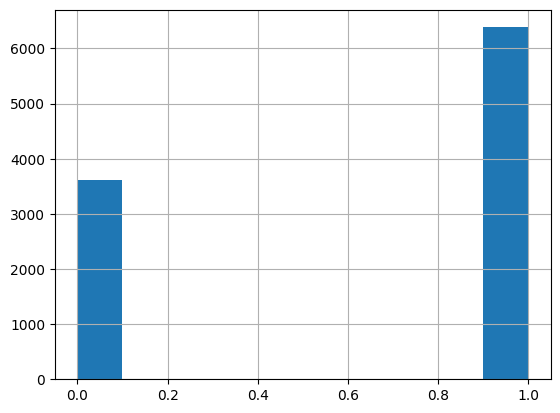

In [20]:
df['Zero Balance'].hist()

In [21]:
# view the counts of column values by grouping 'Churn' and 'Geography'
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

**Define the target(y) and Feature(x)**

In [22]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [23]:
#  Define target (y) and features (X)
y = df['Churn']
x = df.drop(['Churn','Surname'],axis=1)

In [24]:
x.shape,y.shape

((10000, 11), (10000,))

 **Handling Imbalanced Data using
undersampling and oversampling**


In [25]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<ipython-input-26-1e6ecd2b9d08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='Set2')


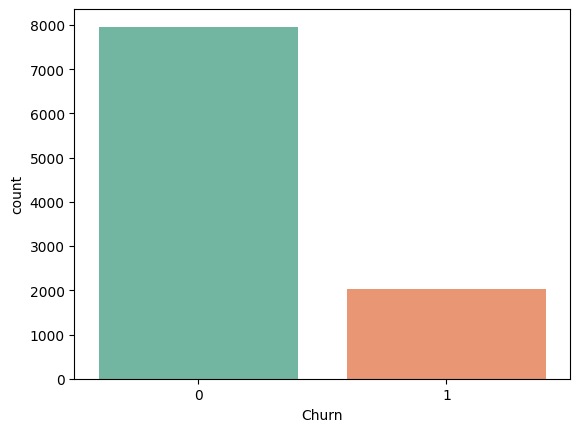

In [26]:
# plot the count
# Plot the count
ax = sns.countplot(x='Churn', data=df, palette='Set2')
ax.legend().remove()  # Remove the legend from the axis

plt.show()

**Random UnderSamplimg**

In [27]:
rus = RandomUnderSampler(random_state=2529)

In [28]:
x_rus,y_rus = rus.fit_resample(x,y)

In [29]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [30]:
# orginal value count of y
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [31]:
# RUS value count of y
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

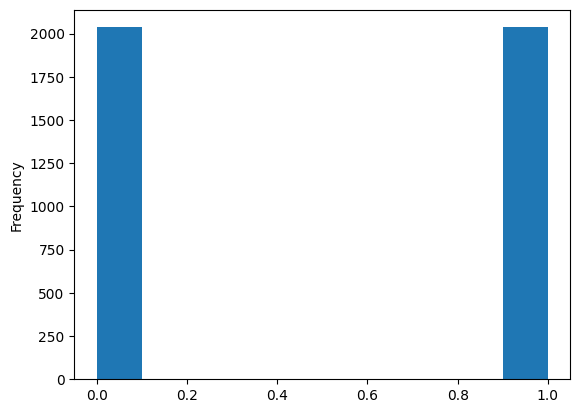

In [32]:
# plot
y_rus.plot(kind='hist')

**Random Over Sampling**

In [33]:
ros = RandomOverSampler(random_state=2529)

In [34]:
x_ros,y_ros = ros.fit_resample(x,y)

In [35]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [36]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [37]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

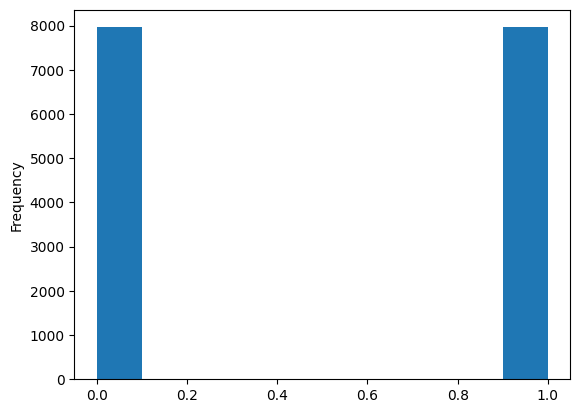

In [38]:
y_ros.plot(kind = 'hist')

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

**Split Orginal Dataset**

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

**Split Random Under Sampling Dataset**

In [41]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

**Split Random Over Sampling Dataset**

In [42]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

# Standardize Feature

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

**Standardize Orginal Dataset**

In [44]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore'	,'Age'	,'Tenure'	,'Balance','Estimated Salary']])

In [45]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore'	,'Age'	,'Tenure'	,'Balance','Estimated Salary']])

**Standardize Random Under Sampling**

In [50]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore'	,'Age'	,'Tenure'	,'Balance','Estimated Salary']])

In [47]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore'	,'Age'	,'Tenure'	,'Balance','Estimated Salary']])

**Standardize Random Over Sampling**

In [48]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore'	,'Age'	,'Tenure'	,'Balance','Estimated Salary']])

In [49]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore'	,'Age'	,'Tenure'	,'Balance','Estimated Salary']])

# **Support Vector Machine Classifier (SVM)**

In [51]:
svc = SVC()

**Train and evaluate model on original dataset**

In [52]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Original Dataset")
print("---------------confusion_matrix------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("---------------classification_report-------------------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Original Dataset
---------------confusion_matrix------------------------------------------------------------------------------
[[2380   34]
 [ 410  176]]
---------------classification_report-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.84      0.30      0.44       586

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000



**Train and evaluate model on undersampled dataset**

In [53]:
svc.fit(x_train_rus,y_train_rus)
y_pred_rus = svc.predict(x_test_rus)
print("Random Under Sampling")
print("---------------confusion_matrix-------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test_rus, y_pred_rus))
print("---------------classification_report--------------------------------------------------------------------------------------")
print(classification_report(y_test_rus, y_pred_rus))

Random Under Sampling
---------------confusion_matrix-------------------------------------------------------------------------------------------
[[489 138]
 [181 415]]
---------------classification_report--------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.70      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



**Train and evaluate model on oversampled dataset**

In [54]:
svc.fit(x_train_ros,y_train_ros)
y_pred_ros = svc.predict(x_test_ros)
print("Random Over Sampling")
print("---------------confusion_matrix-------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test_ros, y_pred_ros))
print("---------------classification_report--------------------------------------------------------------------------------------")
print(classification_report(y_test_ros, y_pred_ros))

Random Over Sampling
---------------confusion_matrix-------------------------------------------------------------------------------------------
[[1928  451]
 [ 599 1800]]
---------------classification_report--------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      2379
           1       0.80      0.75      0.77      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



# Hyperparameter Tuning

In [55]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

In [56]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

**Orginal Dataset**

In [57]:
# Hyperparameter tuning on original dataset
grid.fit(x_train, y_train)
print("---------------Random Over Sampling Best Estimator------------------------------------------------------------------------")
print(grid.best_estimator_)
print("---------------confusion_matrix-------------------------------------------------------------------------------------------")
grid_pred = grid.predict(x_test)
print(confusion_matrix(y_test, grid_pred))
print("---------------classification_report--------------------------------------------------------------------------------------")
print(classification_report(y_test, grid_pred))

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gam

**Random Under Sampling**

In [58]:
# Hyperparameter tuning on undersampled dataset
grid.fit(x_train_rus, y_train_rus)
print("---------------Random Over Sampling Best Estimator------------------------------------------------------------------------")
print(grid.best_estimator_)
print("---------------confusion_matrix-------------------------------------------------------------------------------------------")
grid_pred_rus = grid.predict(x_test_rus)
print(confusion_matrix(y_test_rus, grid_pred_rus))
print("---------------classification_report--------------------------------------------------------------------------------------")
print(classification_report(y_test_rus, grid_pred_rus))

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gam

**Random Over Sampling**

In [59]:
# Hyperparameter tuning on oversampled dataset
grid.fit(x_train_ros, y_train_ros)
print("---------------Random Over Sampling Best Estimator------------------------------------------------------------------------")
print(grid.best_estimator_)
print("---------------confusion_matrix-------------------------------------------------------------------------------------------")
grid_pred_ros = grid.predict(x_test_ros)
print(confusion_matrix(y_test_ros, grid_pred_ros))
print("---------------classification_report--------------------------------------------------------------------------------------")
print(classification_report(y_test_ros, grid_pred_ros))

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gam

# **Explanation about the project**

*   In this project we have used SVM(Support Vector Machine) to classify the bank customers into the customers who are likely to leave the bank(close their account) using the dataset available corresponding to it.
*   We have analysed the data and have performed required data encoding, performed proper data preprocessing and also have handled the data imbalance for the corresponding class by using the techniques like Random Under Sampling and Random Over Sampling.
*   Three different datasets were created:
*   Original dataset
*   Random under-sampled dataset
*   Random over-sampled dataset
*   
A Support Vector Machine (SVM) classifier was then trained on each of these datasets, and the accuracy of each model was evaluated using confusion matrices and classification reports.
*   We also compared the accuracy of the SVM model by using actual data, random oversampled data and random undersampled data which came to be similar.
*   Finally we perfomed hyperparameter tuning for improving the model and then performed the same for all the three cases of dataset and found by analysing the results that the accuracy of SVM model after hyperparameter tuning which was trained using random oversampled data was maximum.

*  Hence, we concluded that the model trained with random oversampled data and after hyperparameter tuning is most accurate and practical to be used for the task.




